In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import torch
import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance
from models.diffusion import *

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model_type = 'diff'
fname = 'v3'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

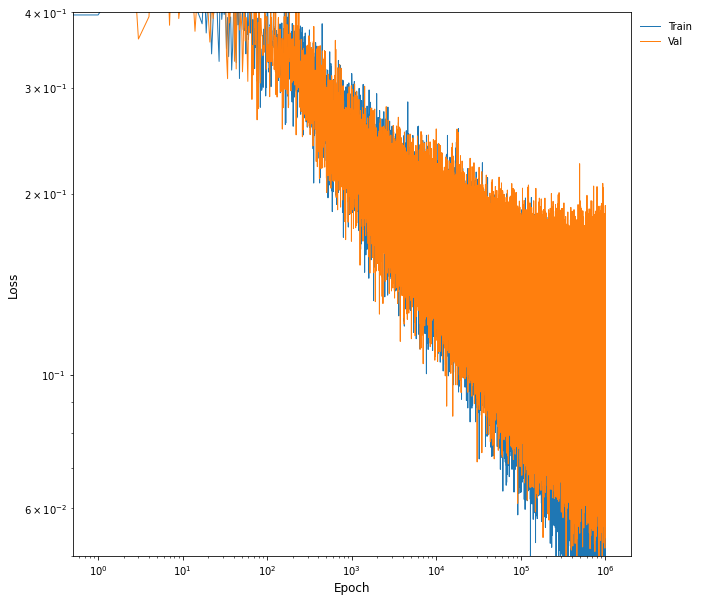

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
# plt.ylim(0,1.1*train_loss_list[0])
plt.ylim(0.05,0.4)
plt.show()

In [5]:
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs, cond_scale=0.75)
# mmd_zeo_agg_df, wsd_zeo_agg_df = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs)
# mmd_zeo_osda_df, wsd_zeo_osda_df = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

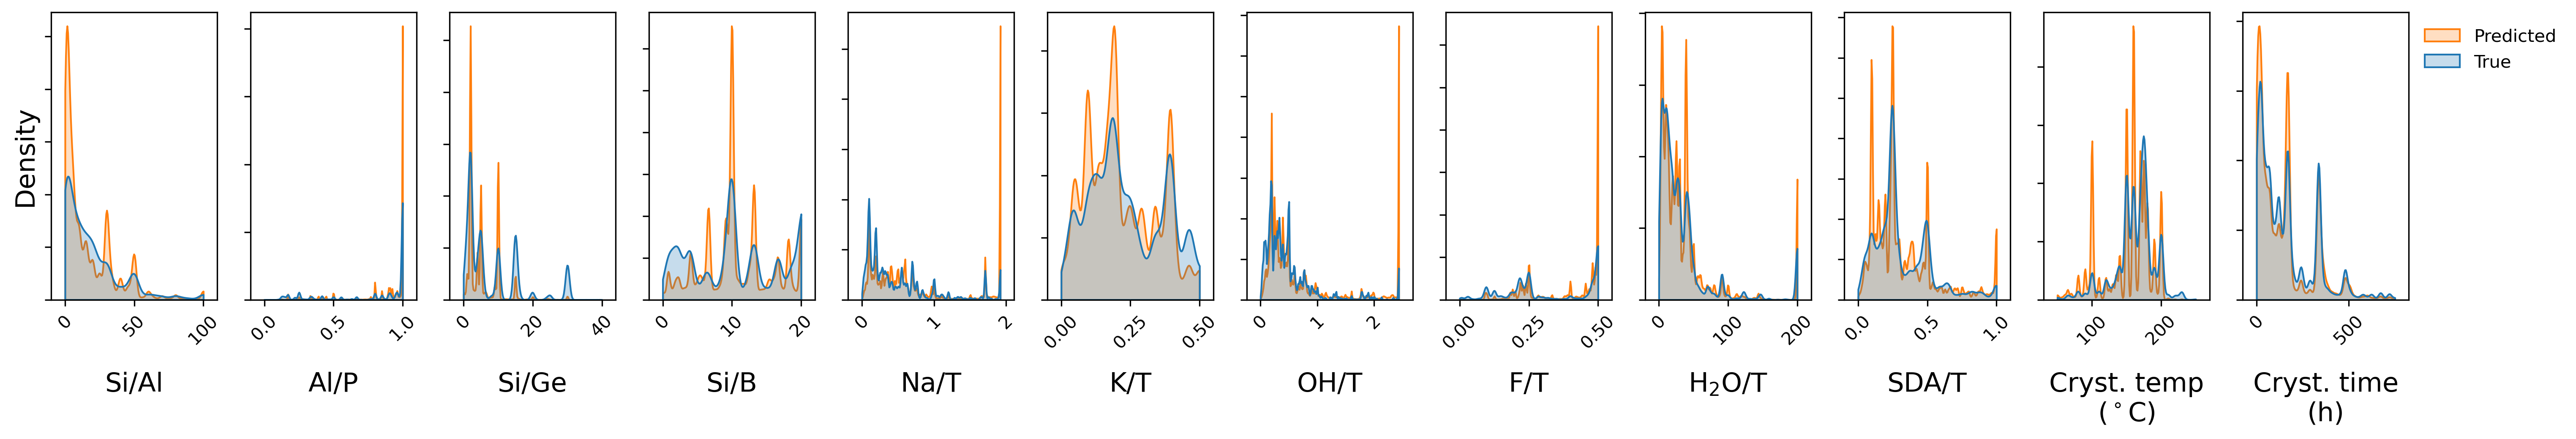

Figure saved at figs/diff_outputs_agg.pdf


In [18]:
# utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [False, False], [True, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5, 
#                                                                     xlims={
#                                                                             'Si/Al': {'min': 0., 'max': 100.},
#                                                                             'Al/P': {'min': 0., 'max': 1.},
#                                                                             'Si/Ge': {'min': 0., 'max': 40.},
#                                                                             'Si/B': {'min': 0., 'max': 20.},
#                                                                             'K/T': {'min': 0., 'max': 0.5},
#                                                                             'F/T': {'min': 0., 'max': 0.5},
#                                                                             'sda1/T': {'min': 0., 'max': 1.},
#                                                                             'cryst_temp': {'min': 50., 'max': 250}, 
#                                                                             'cryst_time': {'min': 0., 'max': 750},
#                                                                           },
#                                                                     #  save_path='figs/diff_outputs_agg.pdf'
#                                                                      )

utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, True], [False, False], ['tab:orange', 'tab:blue'], common_norm=True, alpha=0.25, 
                                                                    xlims={
                                                                            'Si/Al': {'min': 0., 'max': 100.},
                                                                            'Al/P': {'min': 0., 'max': 1.},
                                                                            'Si/Ge': {'min': 0., 'max': 40.},
                                                                            'Si/B': {'min': 0., 'max': 20.},
                                                                            'K/T': {'min': 0., 'max': 0.5},
                                                                            'F/T': {'min': 0., 'max': 0.5},
                                                                            'sda1/T': {'min': 0., 'max': 1.},
                                                                            'cryst_temp': {'min': 50., 'max': 250}, 
                                                                            'cryst_time': {'min': 0., 'max': 750},
                                                                          },
                                                                    bw_adjusts={
                                                                            'Si/Al': 0.1,
                                                                            'Al/P': 0.1,
                                                                            'Si/Ge': 0.1,
                                                                            'Si/B': 0.05,
                                                                            'Na/T': 0.1,
                                                                            'K/T': 0.1,
                                                                            'OH/T': 0.1,
                                                                            'F/T': 0.1,
                                                                            'H2O/T': 0.3,
                                                                            'sda1/T': 0.1,
                                                                            'cryst_temp': 0.5,
                                                                            'cryst_time': 0.2,
                                                                          },
                                                                  non_zeros=['Si/Al', 'Al/P', 'Si/Ge', 'Si/B', 'Na/T', 'K/T', 'OH/T', 'F/T', 'H2O/T', 'sda1/T'],
                                                                  linewidth=1.,
                                                                    #  save_path='figs/diff_outputs_agg.pdf'
                                                                     )

# 2) System-splits

### A) Zeolite-aggregated systems

In [8]:
# _, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

In [11]:
syn_true[syn_true['zeo']=='YFI']

,Si/Al,Al/P,Si/Ge,Si/B,Na/T,K/T,OH/T,F/T,H2O/T,sda1/T,cryst_temp,cryst_time,zeo,osda


AFI
MMD: 0.10529232025146484
WSD: 0.0392456581609765


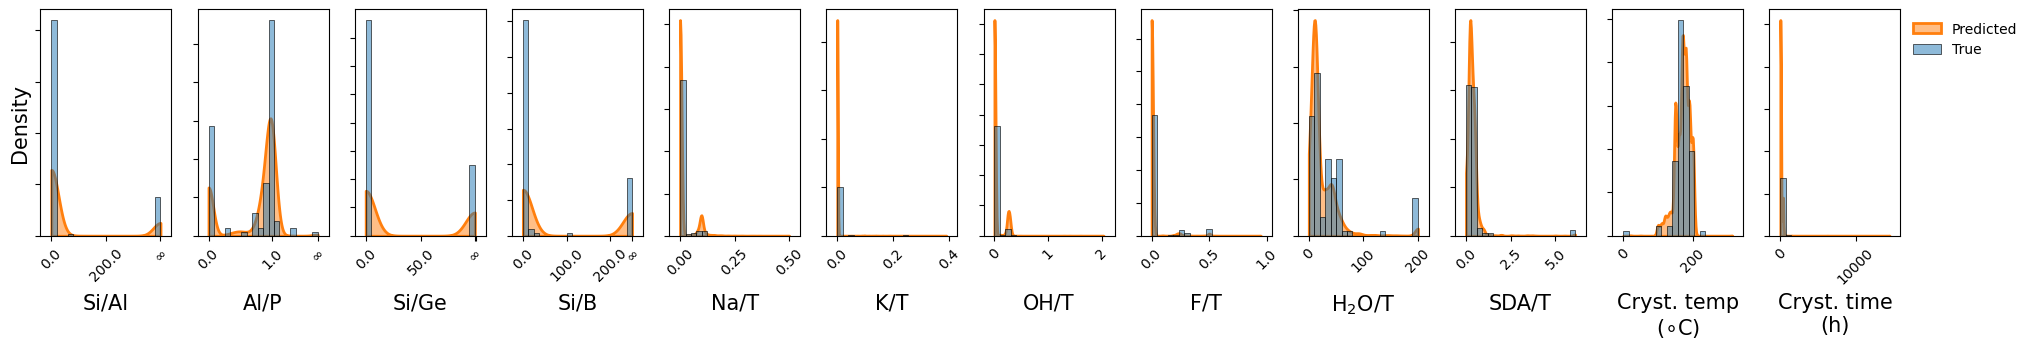

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='AFI')

SAV
MMD: 1.0371475219726562
WSD: 0.4808557698042004


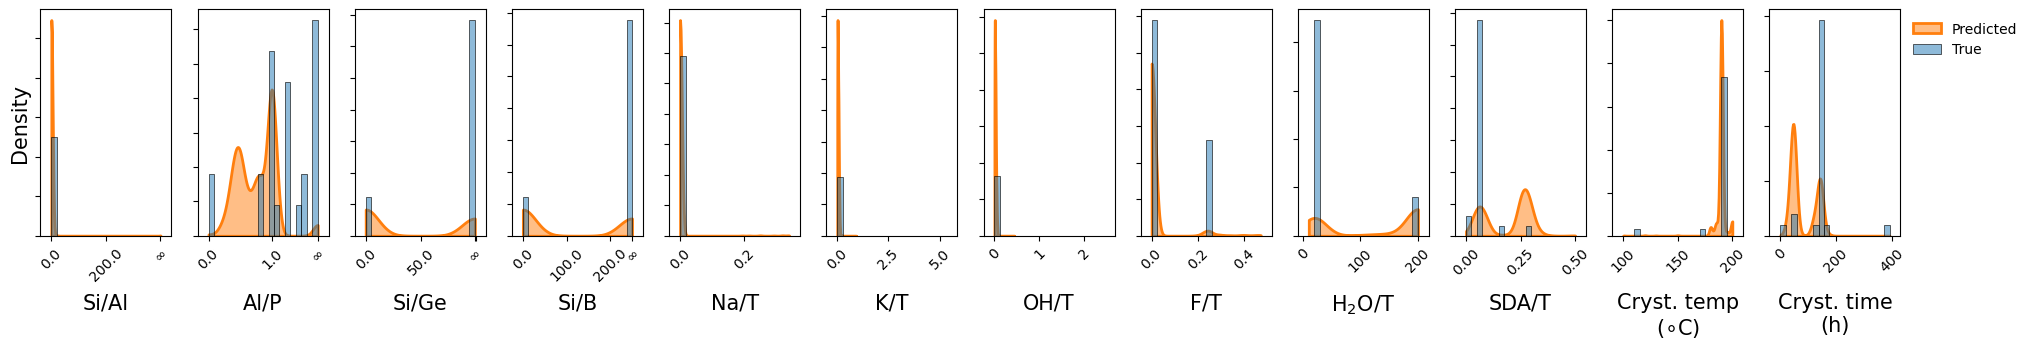

In [8]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 0.15305519104003906
WSD: 0.09012312671509017


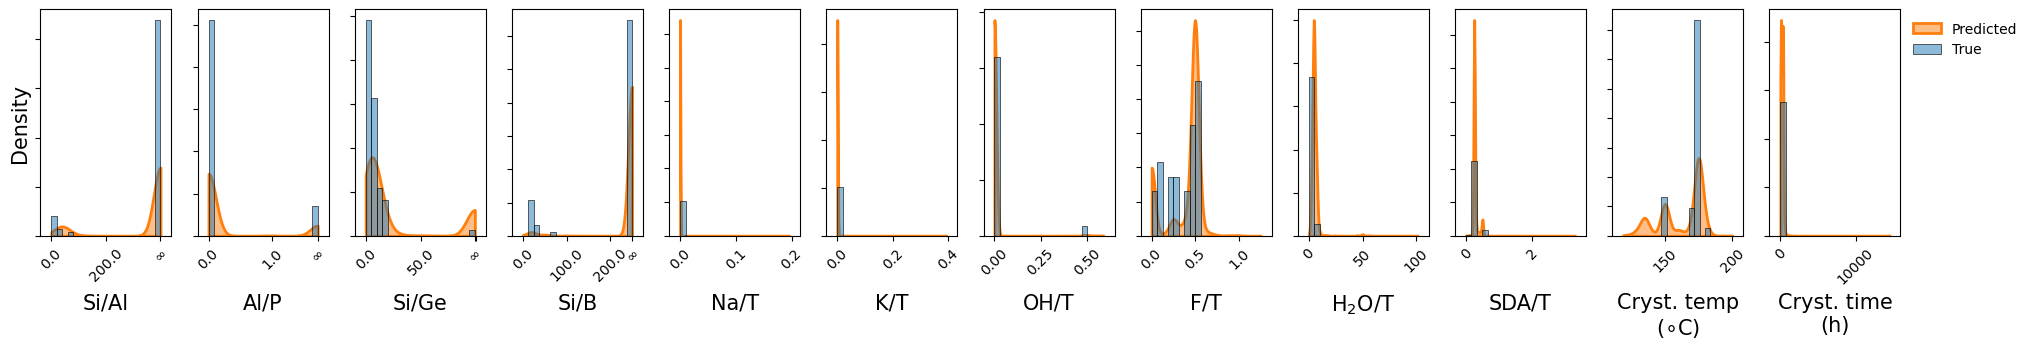

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 0.6125402450561523
WSD: 0.1744210918565499


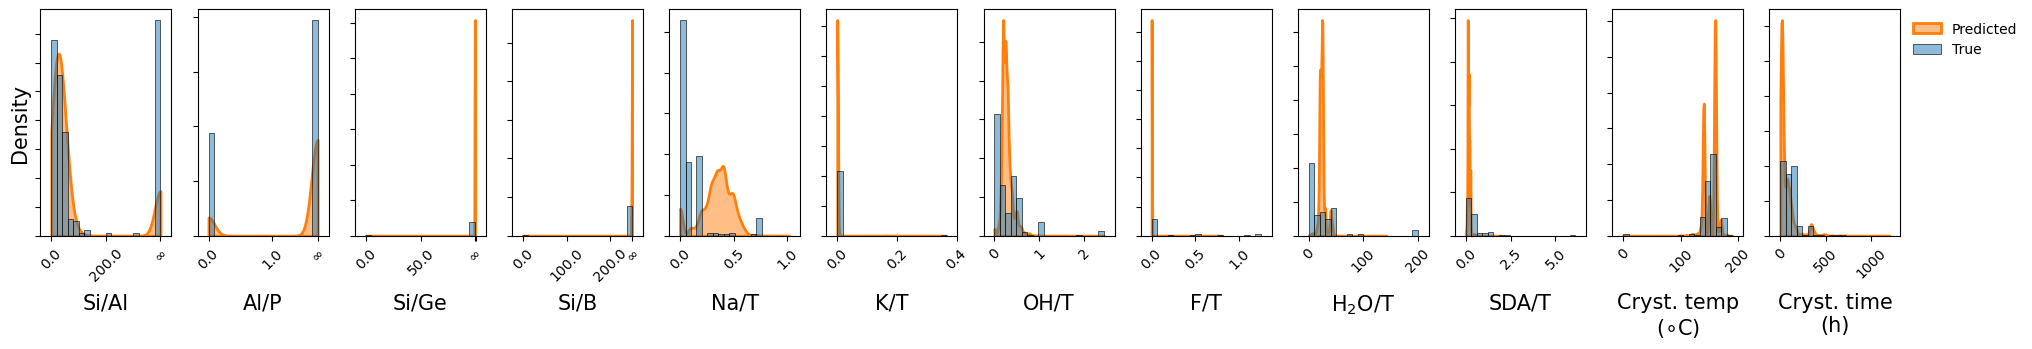

AEL CCCNCCC
MMD: 0.5355758666992188
WSD: 0.10176514648619894


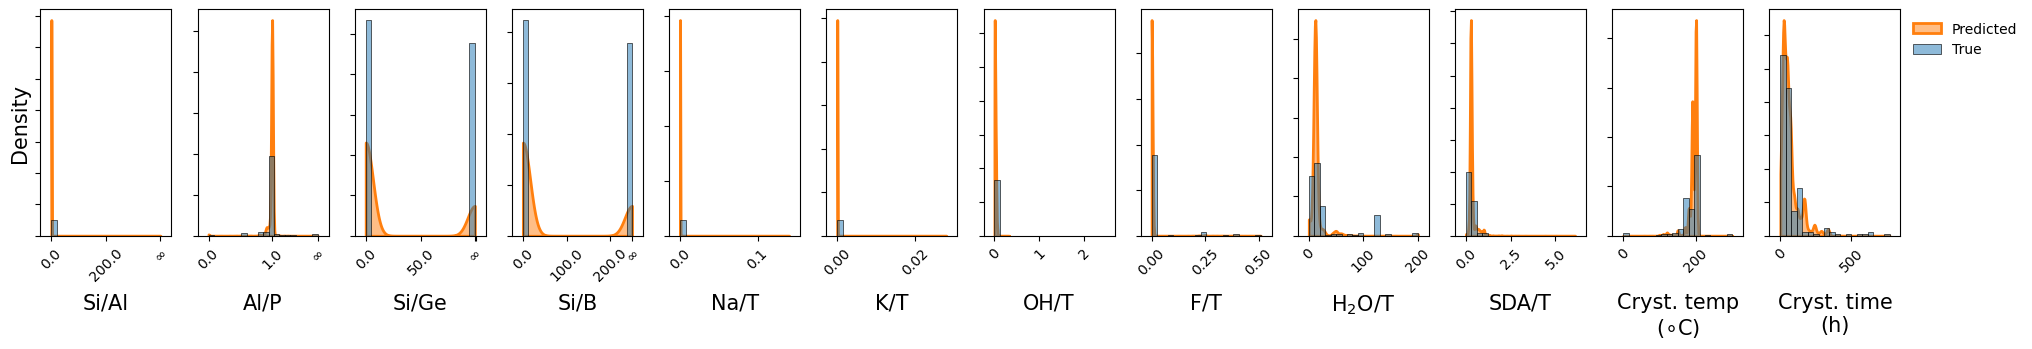

CHA OSDA-free
MMD: 0.850494384765625
WSD: 0.08862225223954348


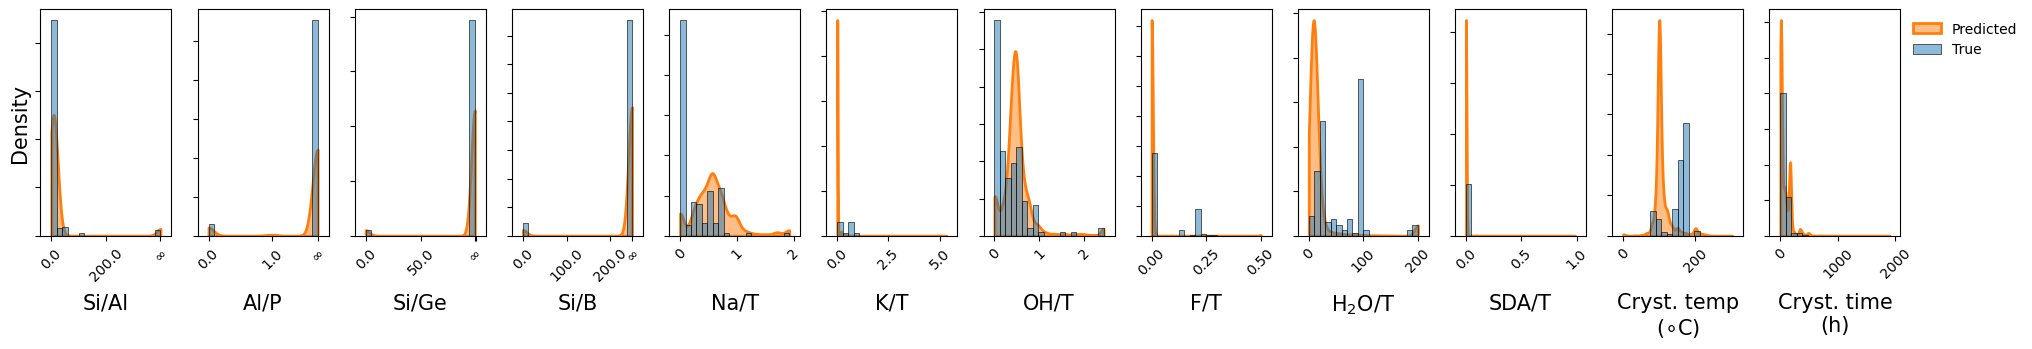

MFI OSDA-free
MMD: 0.46065711975097656
WSD: 0.03393720712226406


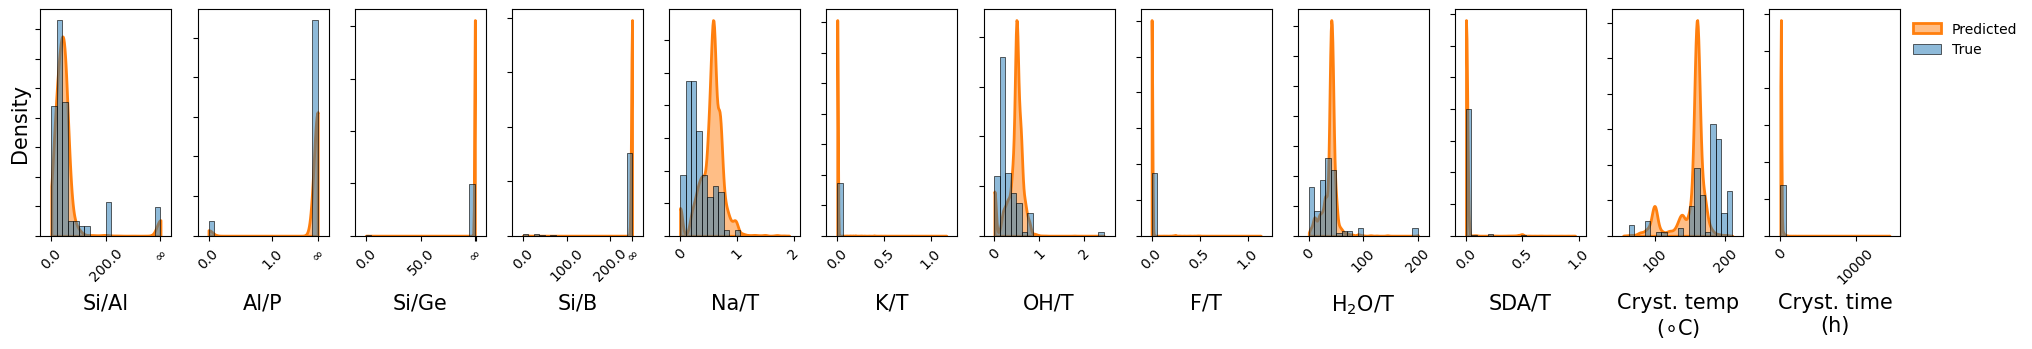

CHA CCN(CC)CC
MMD: 0.6004724502563477
WSD: 0.2214216414613184


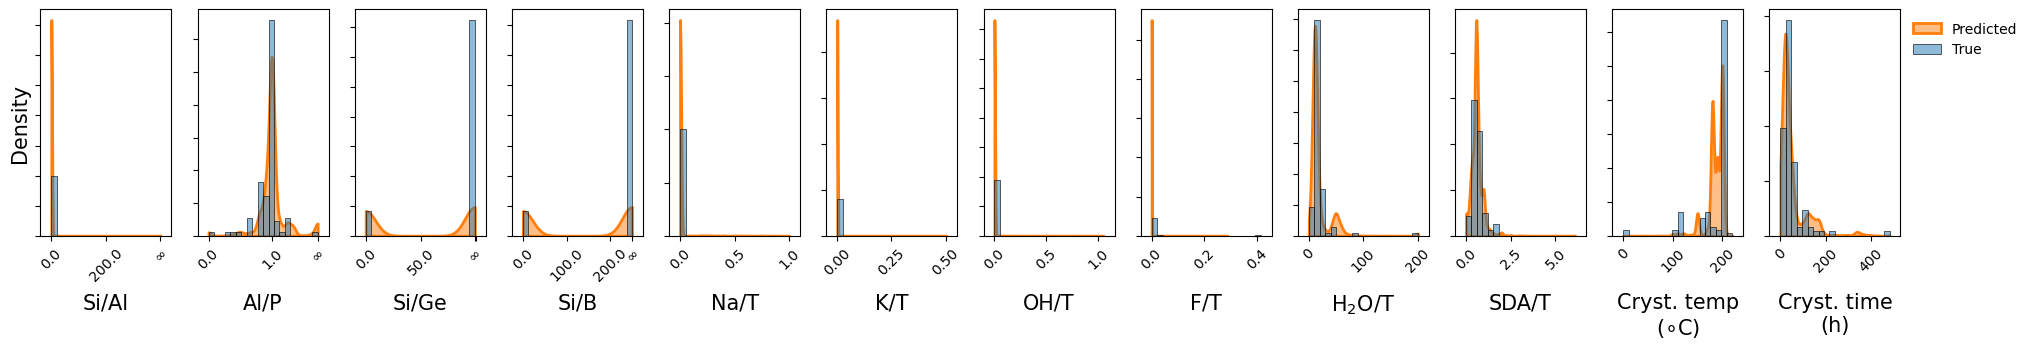

LTA C[N+](C)(C)C
MMD: 1.3553886413574219
WSD: 0.29445999729551936


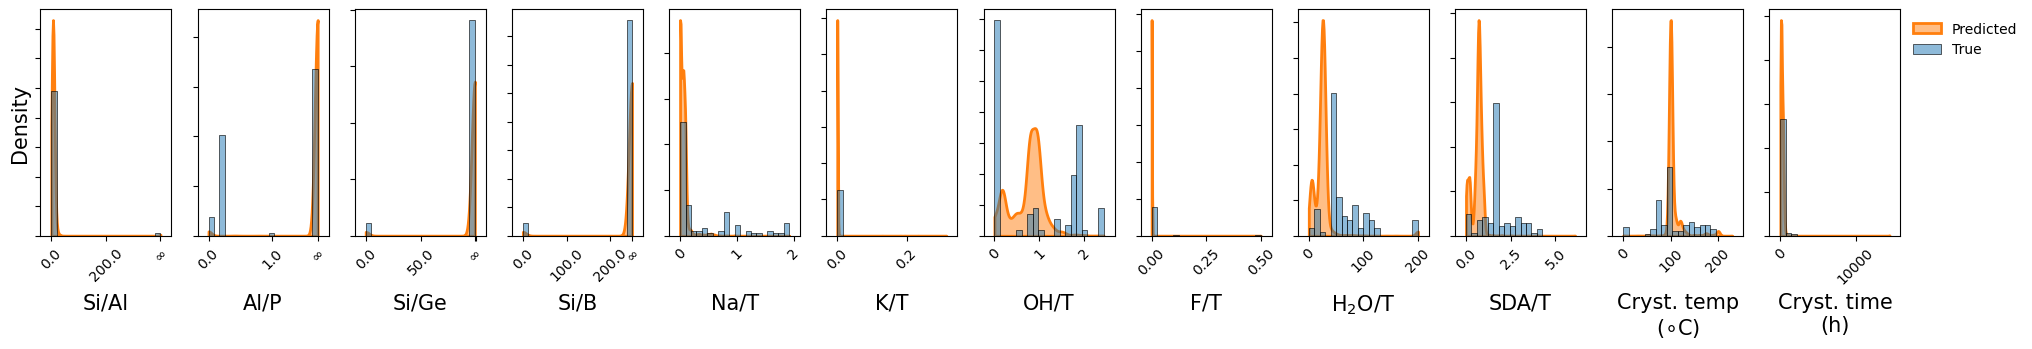

MEL CCCC[N+](CCCC)(CCCC)CCCC
MMD: 0.8056449890136719
WSD: 0.22431138392195588


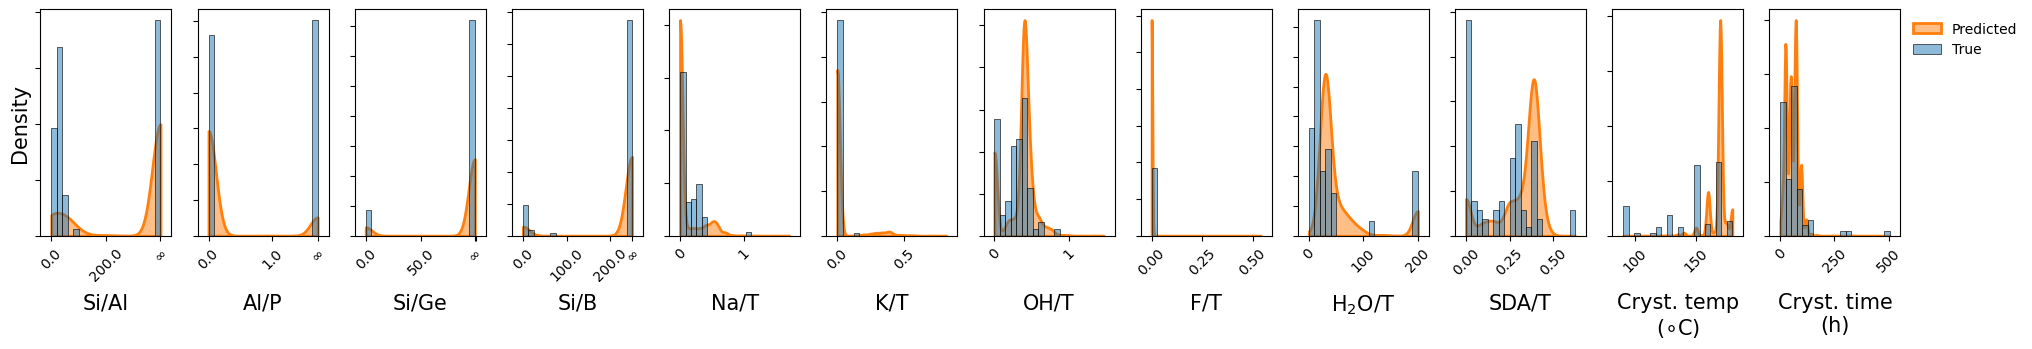

CHA C1COCCN1
MMD: 0.5370759963989258
WSD: 0.2320821330360532


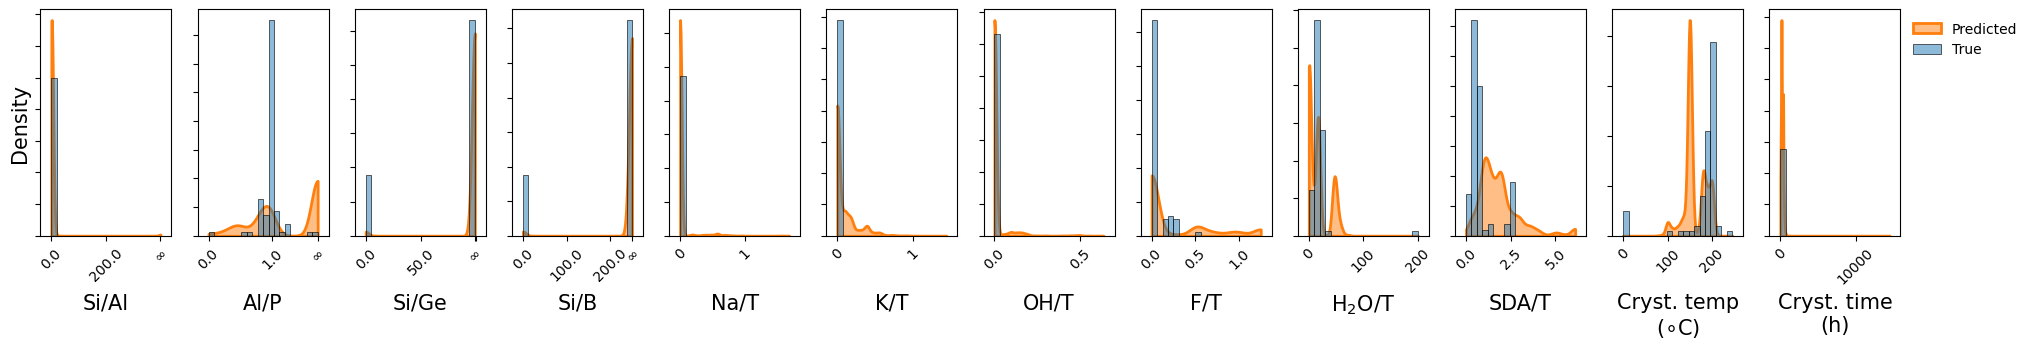

ATO CCCNCCC
MMD: 1.365086555480957
WSD: 0.05456948444690519


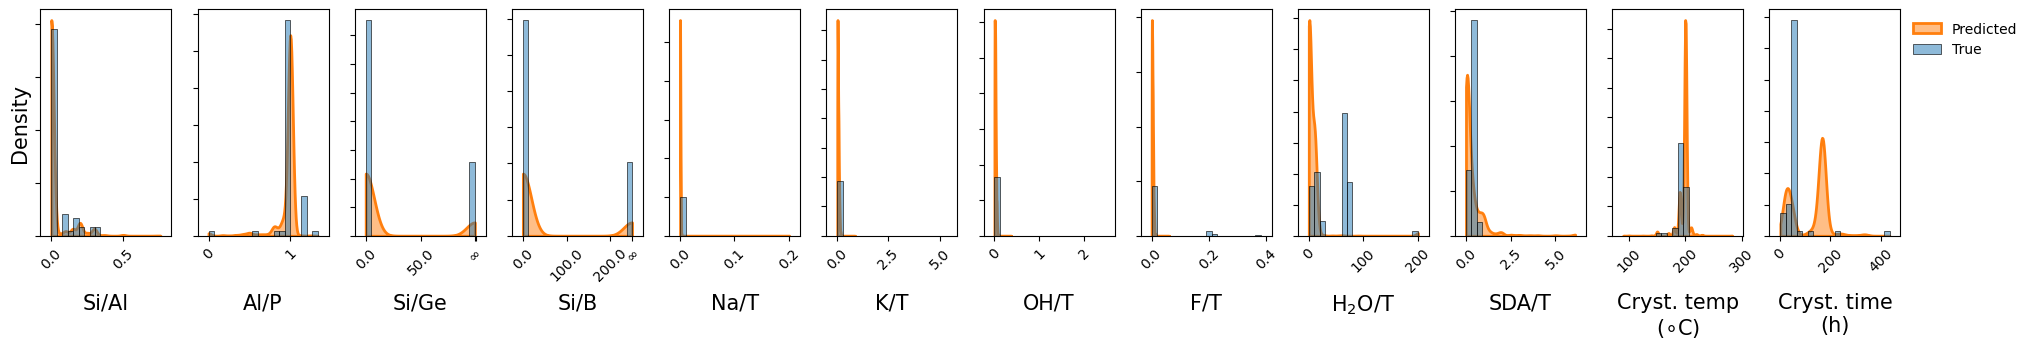

IWR C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.398369312286377
WSD: 0.4324318526866203


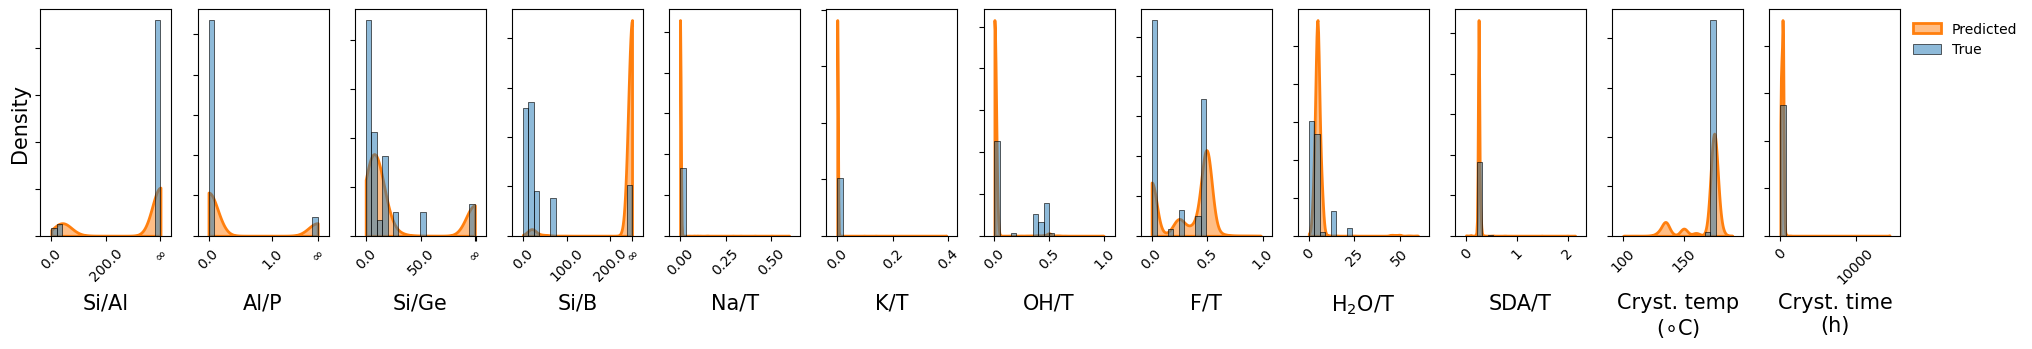

LTA C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2
MMD: 0.5596141815185547
WSD: 0.14290473394335593


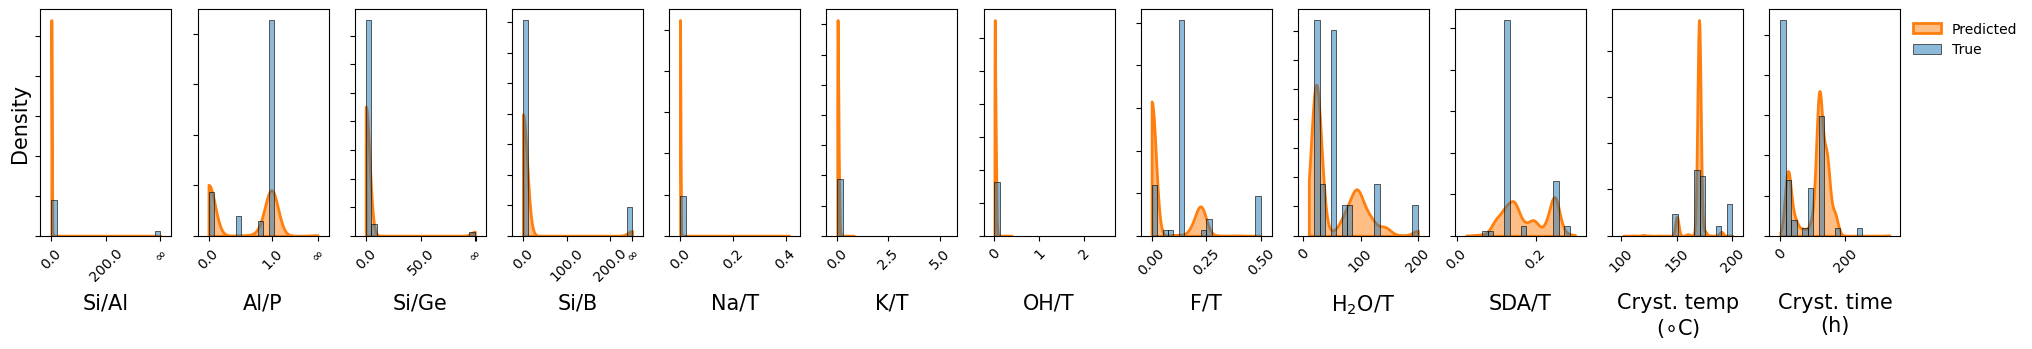

IMF C[N+]1(CCCCC[N+]2(C)CCCC2)CCCC1
MMD: 1.3035602569580078
WSD: 0.23621578420702583


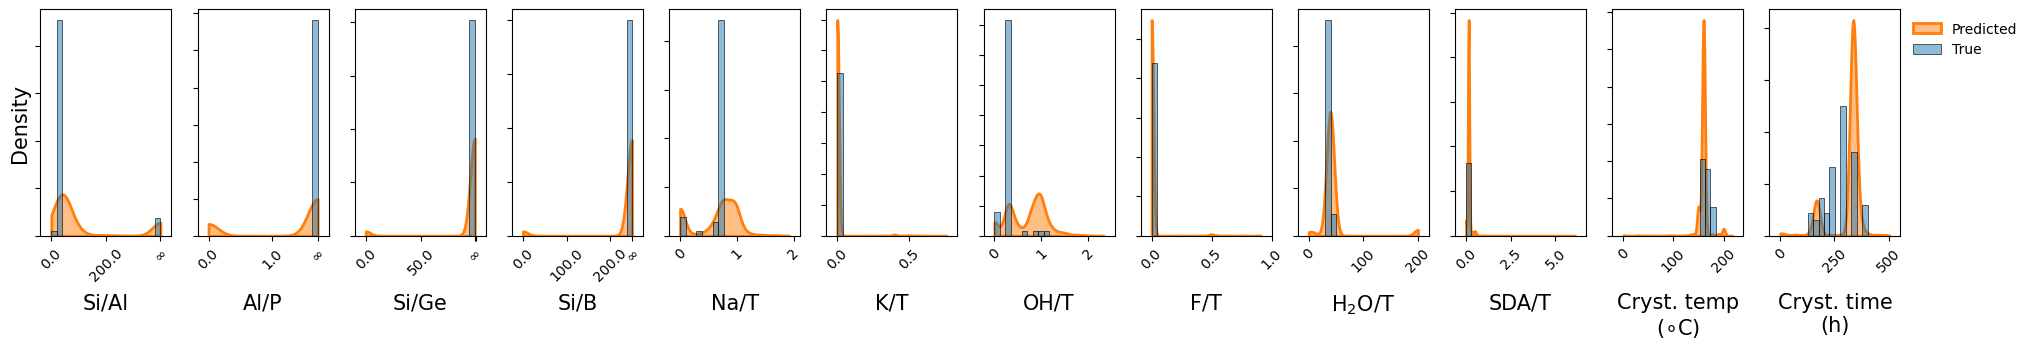

IWR CC[N+]1(CC)CC2C3C(C)=CC(C)(C2C1)C1C[N+](CC)(CC)CC31
MMD: 0.2548398971557617
WSD: 0.13777253622563695


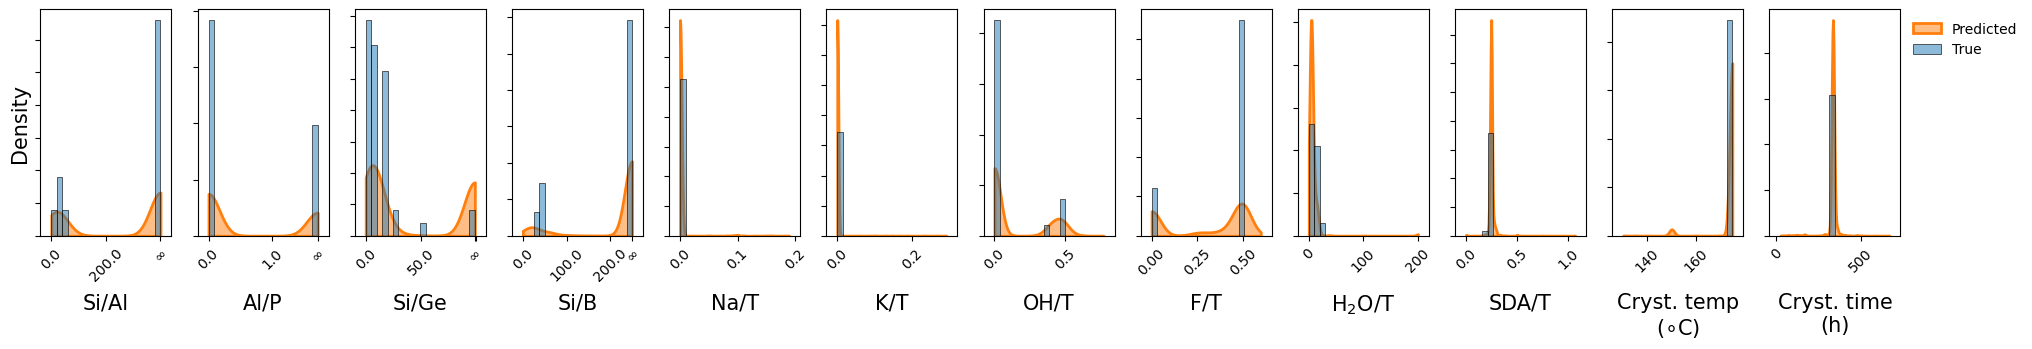

LEV C[N+]12CCC(CC1)CC2
MMD: 0.7717218399047852
WSD: 0.17869969228754784


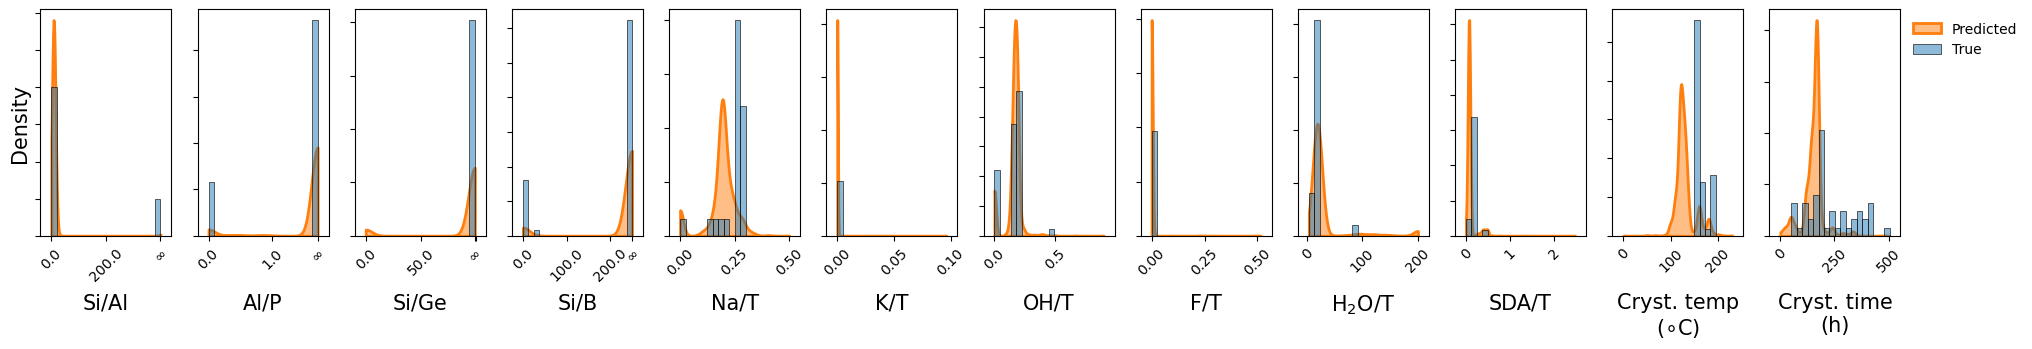

AFI CCCN(CCC)CCC
MMD: 0.16428184509277344
WSD: 0.0718058322925435


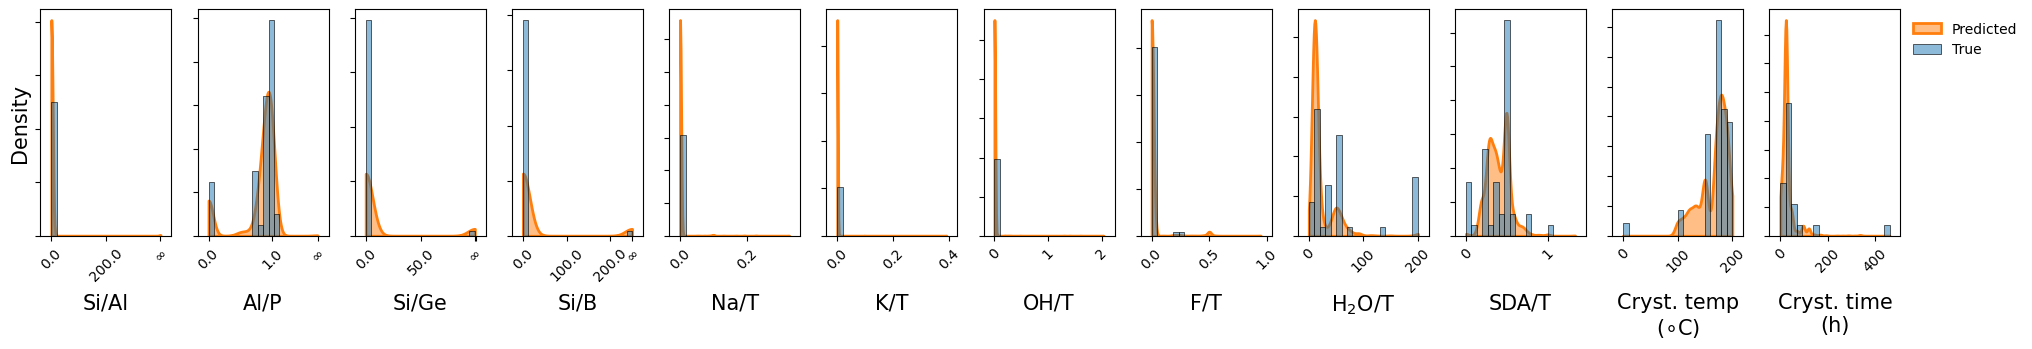

BEC C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 0.3462696075439453
WSD: 0.1643062799370994


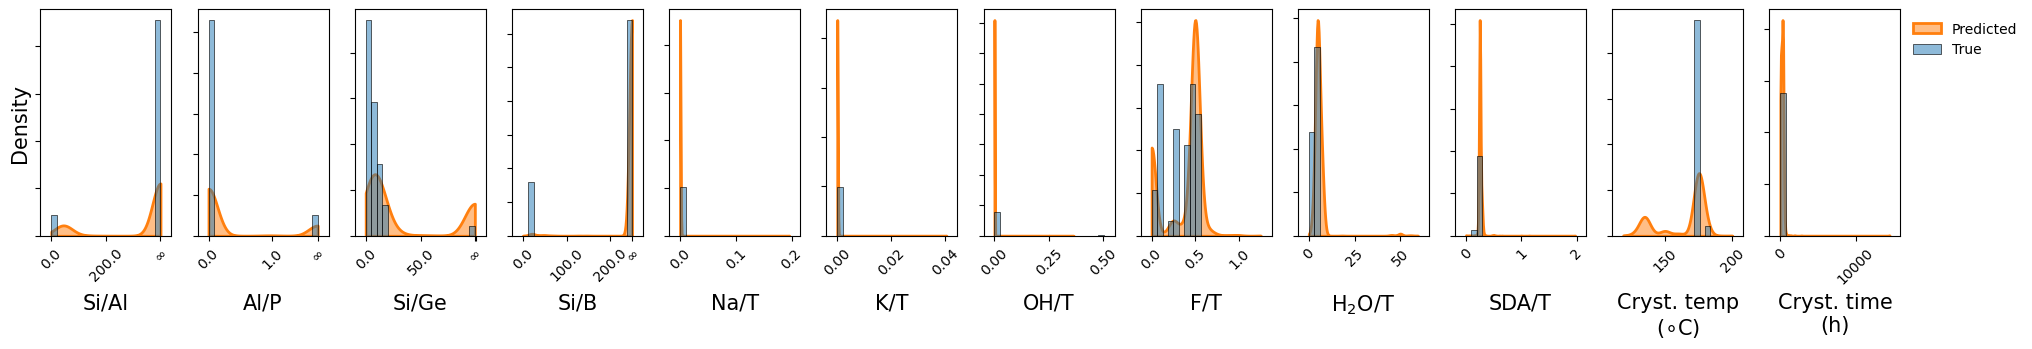

MAZ OSDA-free
MMD: 0.5915746688842773
WSD: 0.15233620187018698


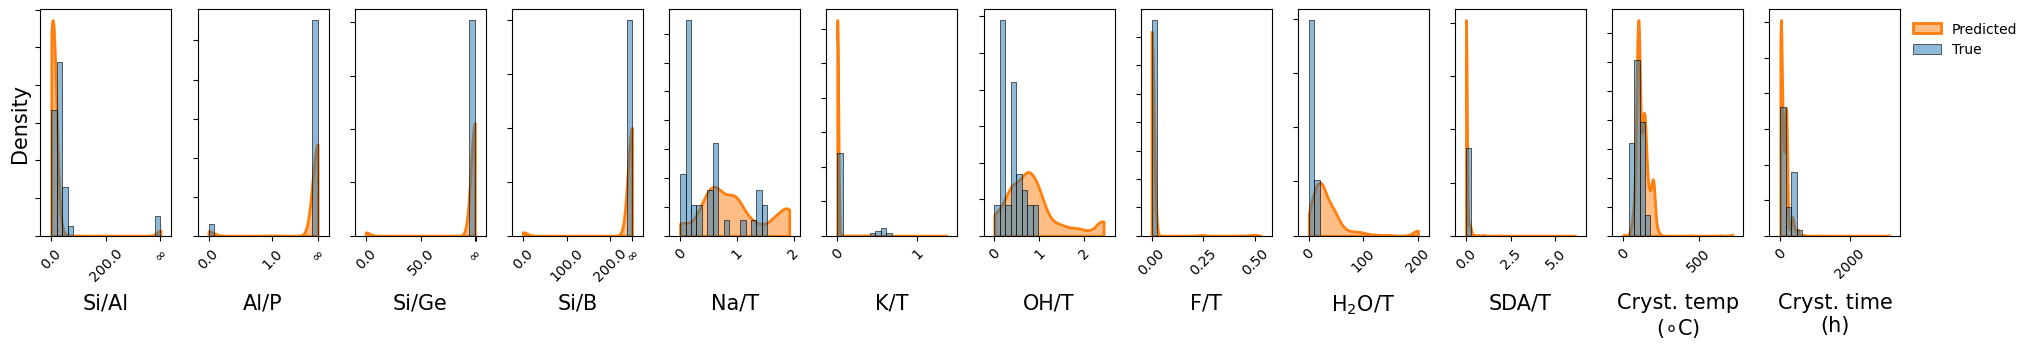

MWW C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 3.0996599197387695
WSD: 0.9347651006692245


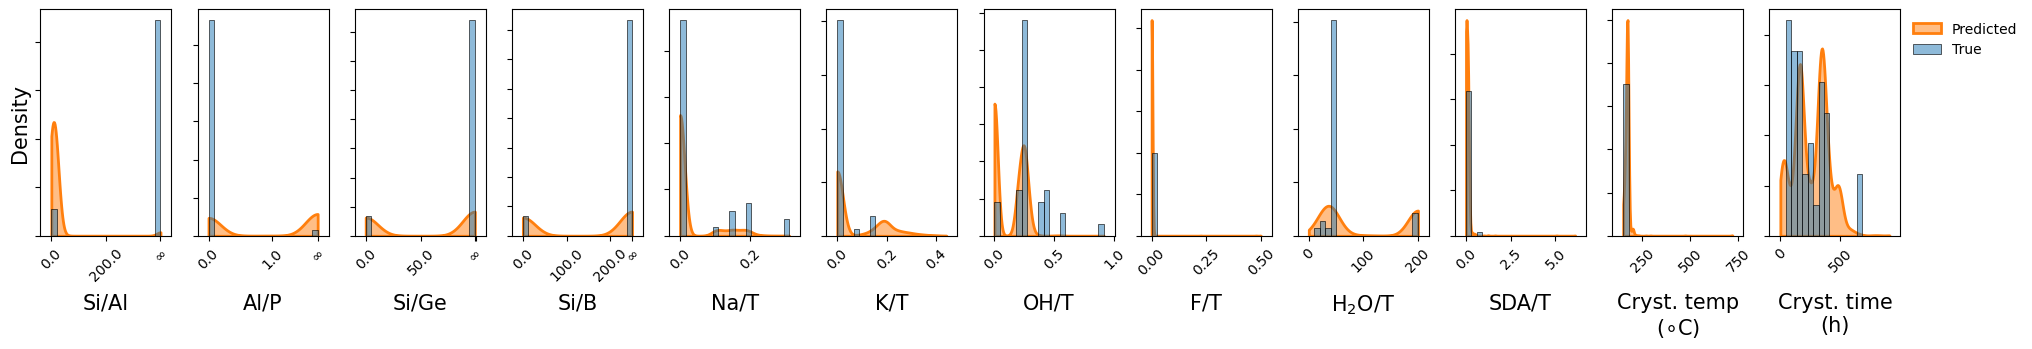

AEN CC[n+]1ccn(C)c1C
MMD: 0.9349098205566406
WSD: 0.04849528953153424


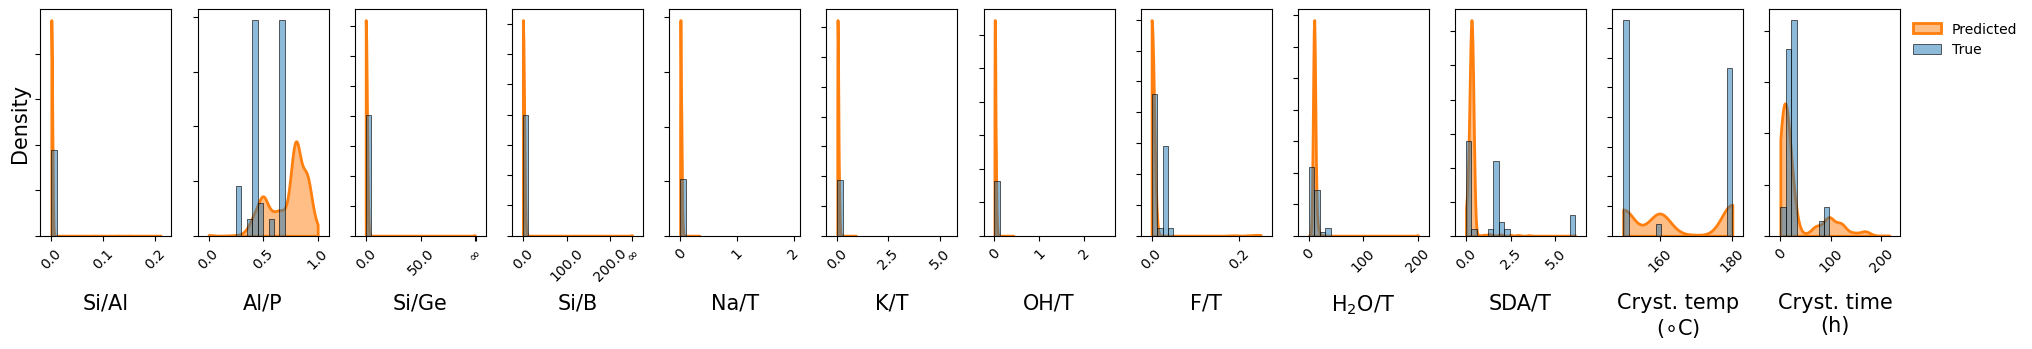

FAU C1COCCOCCOCCOCCOCCO1
MMD: 0.4072751998901367
WSD: 0.13267200171209909


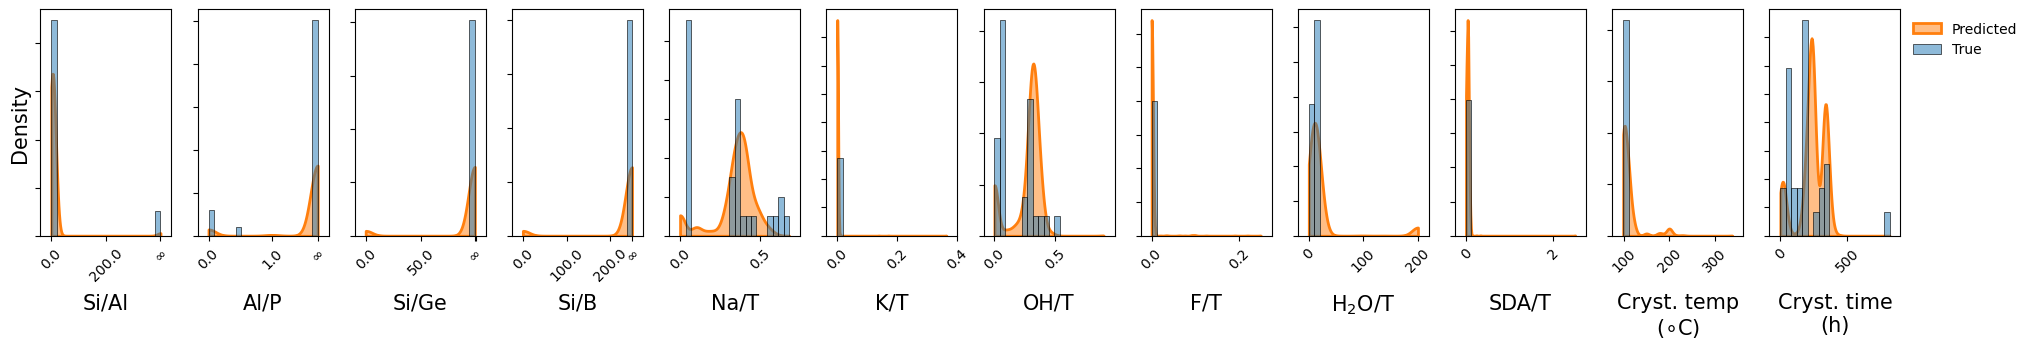

FAU CC[N+](CC)(CC)CC
MMD: 0.9746856689453125
WSD: 0.09853210440467658


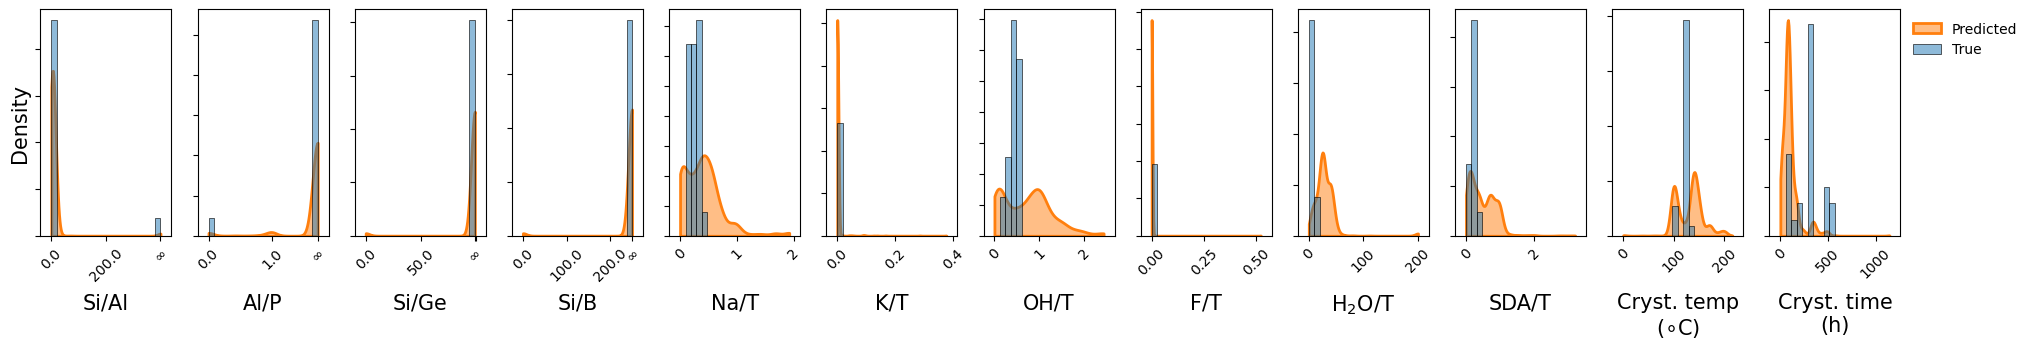

UOV C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C
MMD: 0.7953891754150391
WSD: 0.127322950535929


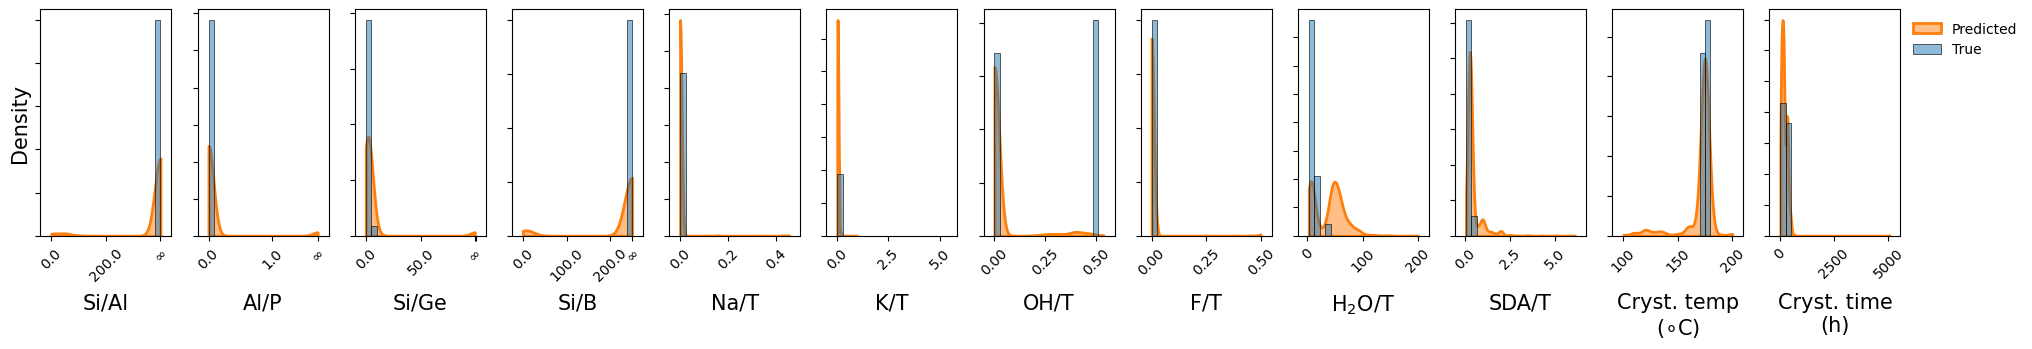

PHI OSDA-free
MMD: 1.0034198760986328
WSD: 0.35740513807611074


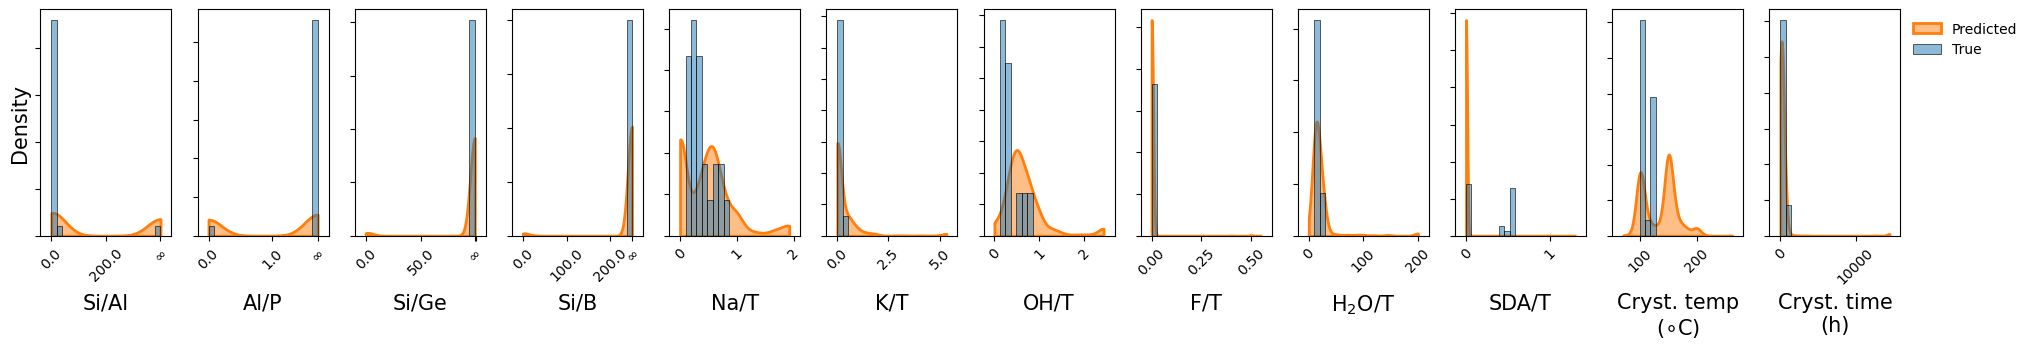

GIS CCCNCCC
MMD: 3.3819355964660645
WSD: 1.298254813537875


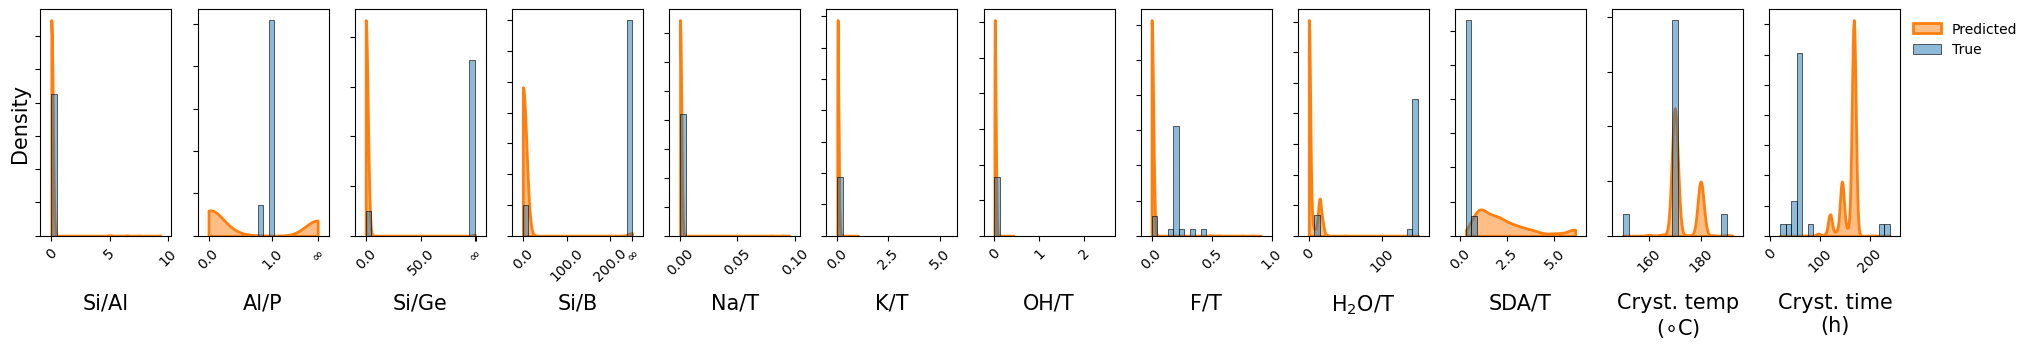

LEV C[N+]1(C)CCCCC1
MMD: 0.5343389511108398
WSD: 0.1581671178608593


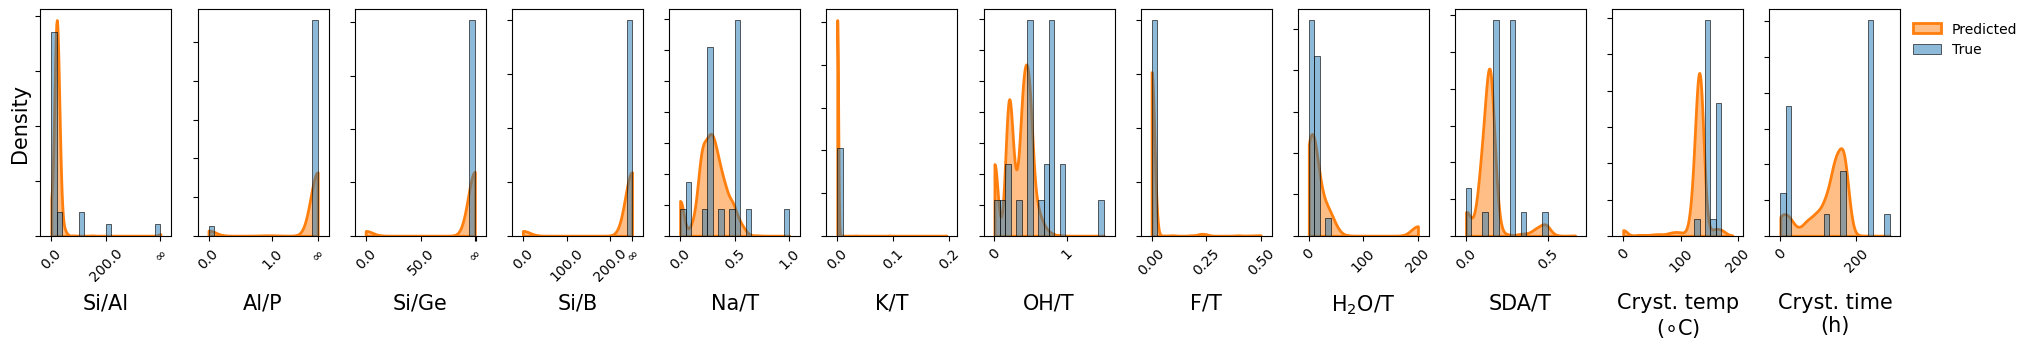

ITT C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.2939300537109375
WSD: 0.5333557244873505


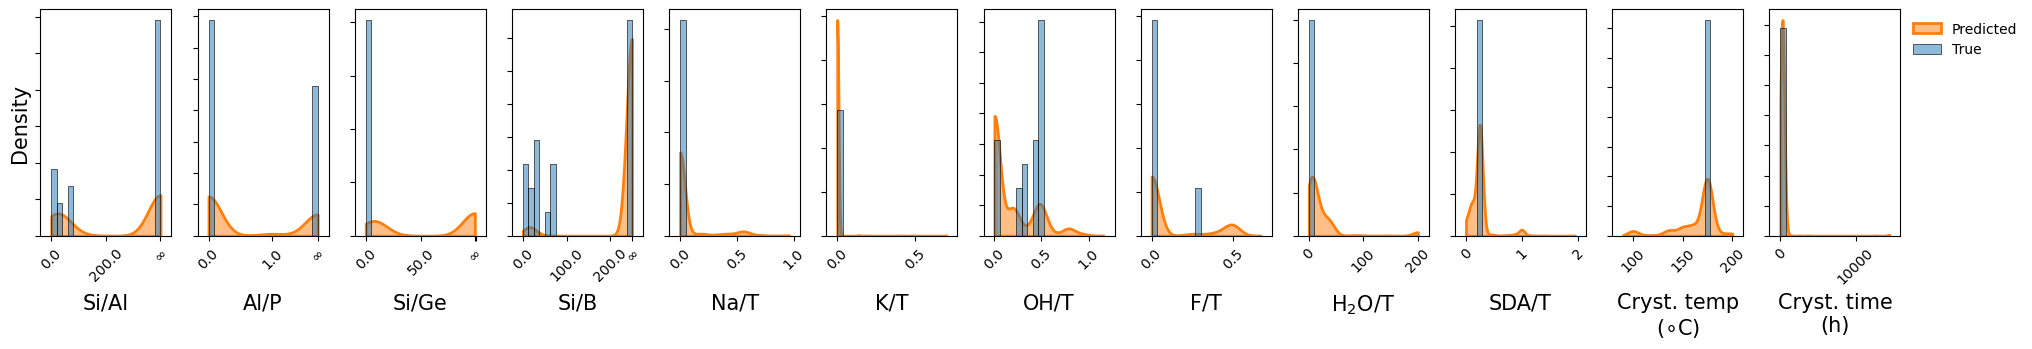

FER C[N+]1(Cc2ccccc2)CCCC1
MMD: 0.2572755813598633
WSD: 0.08417352141977696


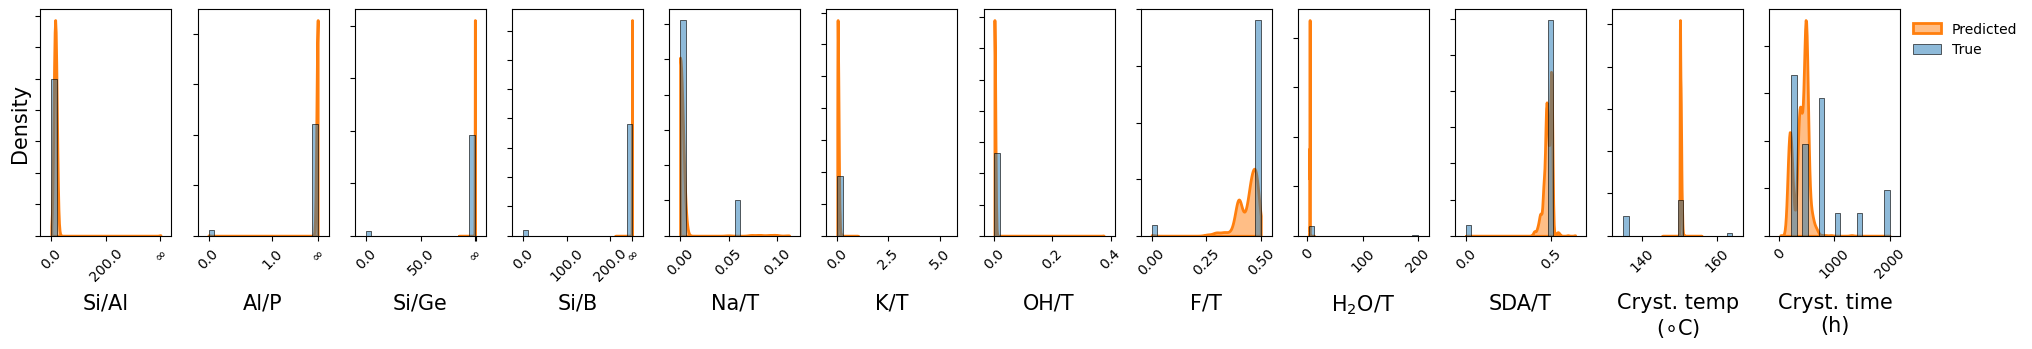

ITG C[N+]1(C)CCC([N+]2(C)CCCC2)CC1
MMD: 0.4244403839111328
WSD: 0.12914867413324996


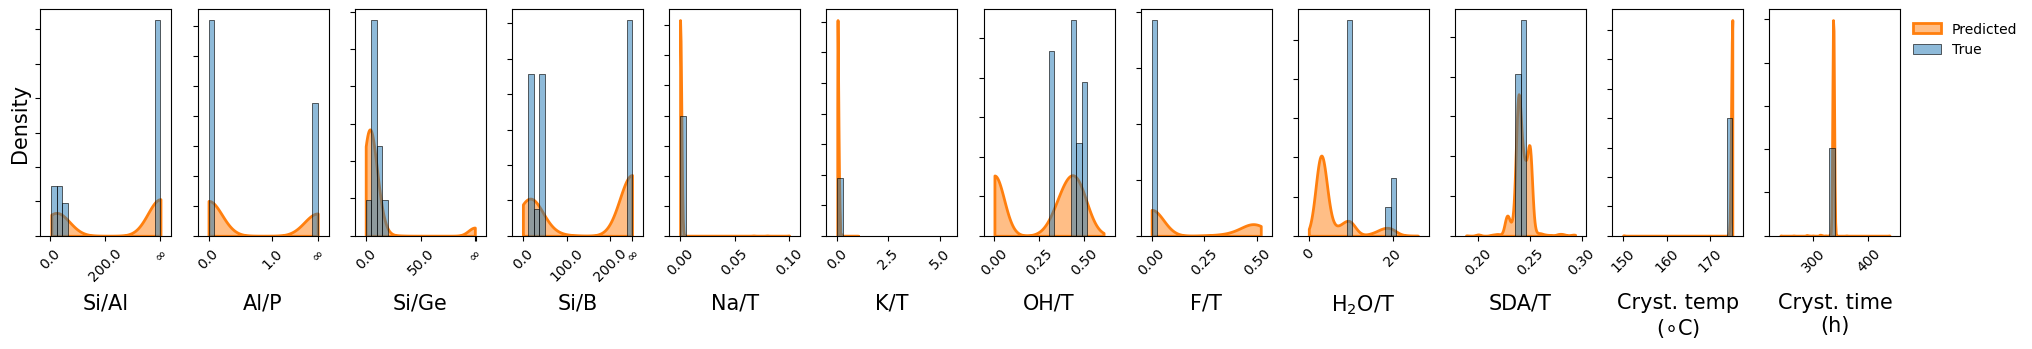

BEA C(CCCC[N+]12CCC(CC1)CC2)CCC[N+]12CCC(CC1)CC2
MMD: 2.2058820724487305
WSD: 0.646107919427079


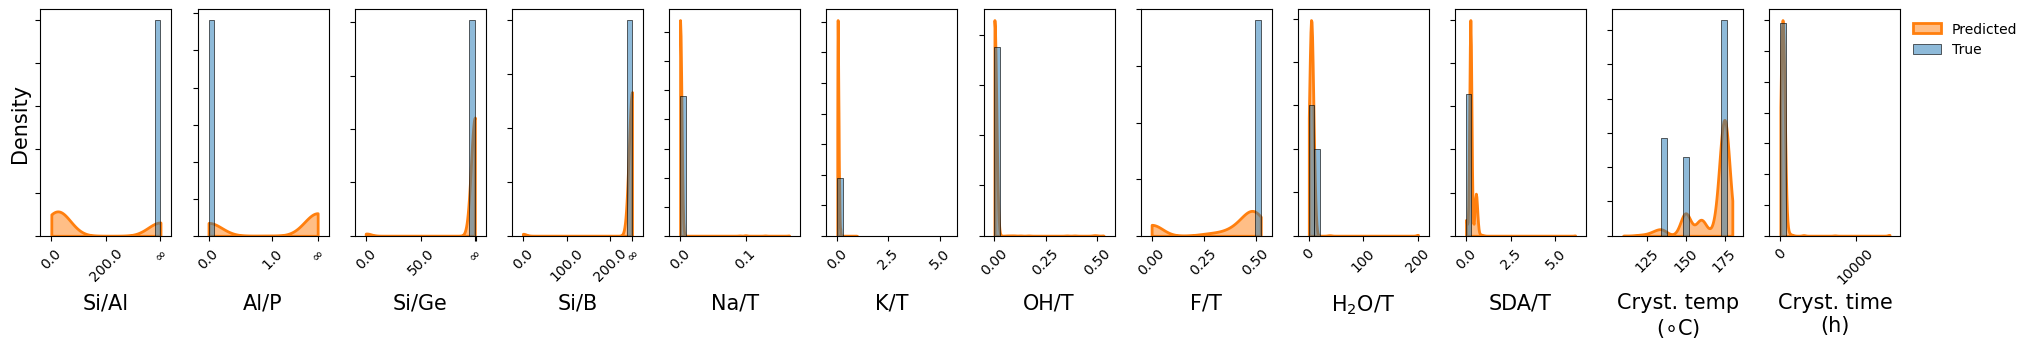

SAV C1CNCCCNCCNCCNC1
MMD: 1.2688779830932617
WSD: 0.7672109326460451


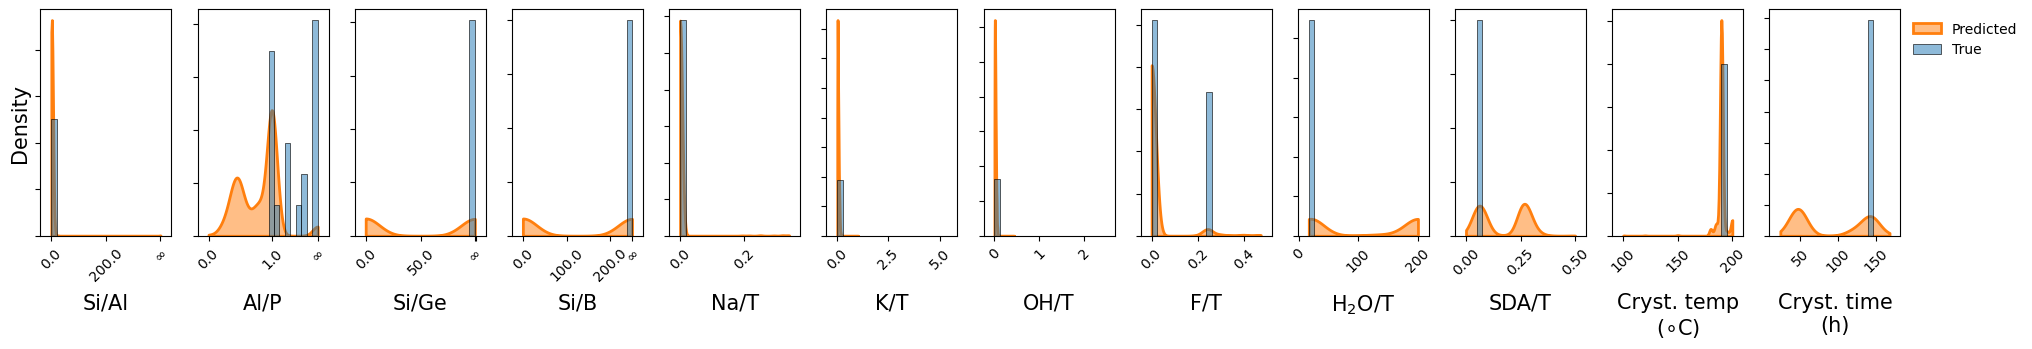

AEI CC[P+](CC)(CC)CC
MMD: 3.383622646331787
WSD: 1.0682734185092588


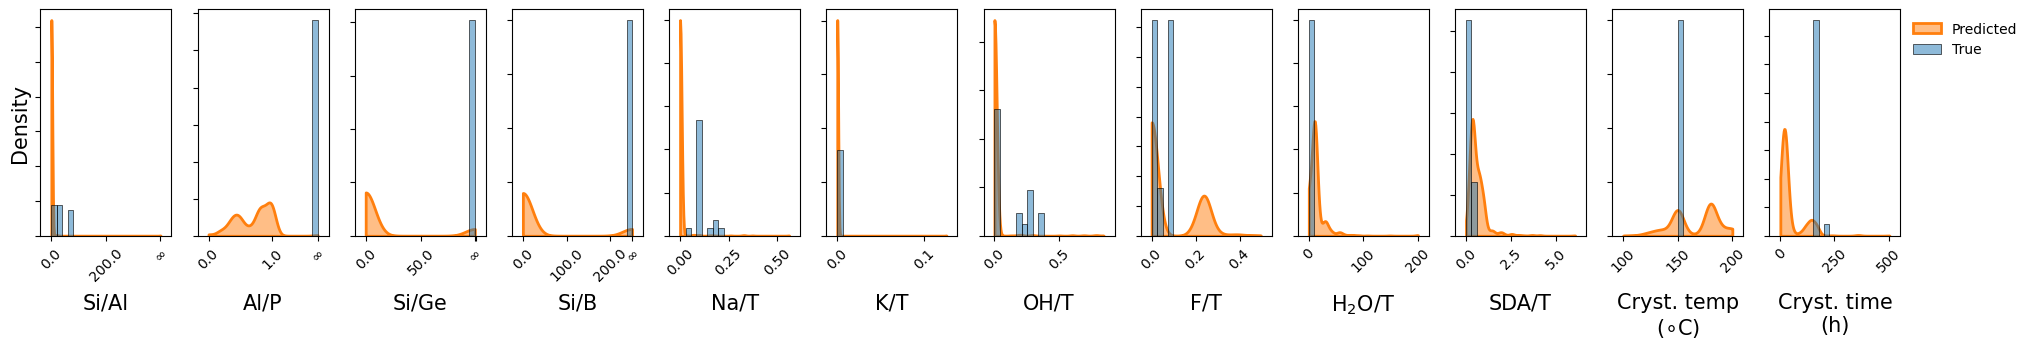

AFI C[N+]12CCCC[C@@H]1[C@H]1C[C@@H](C2)[C@@H]2CCCCN2C1
MMD: 0.9512653350830078
WSD: 0.14399032673143997


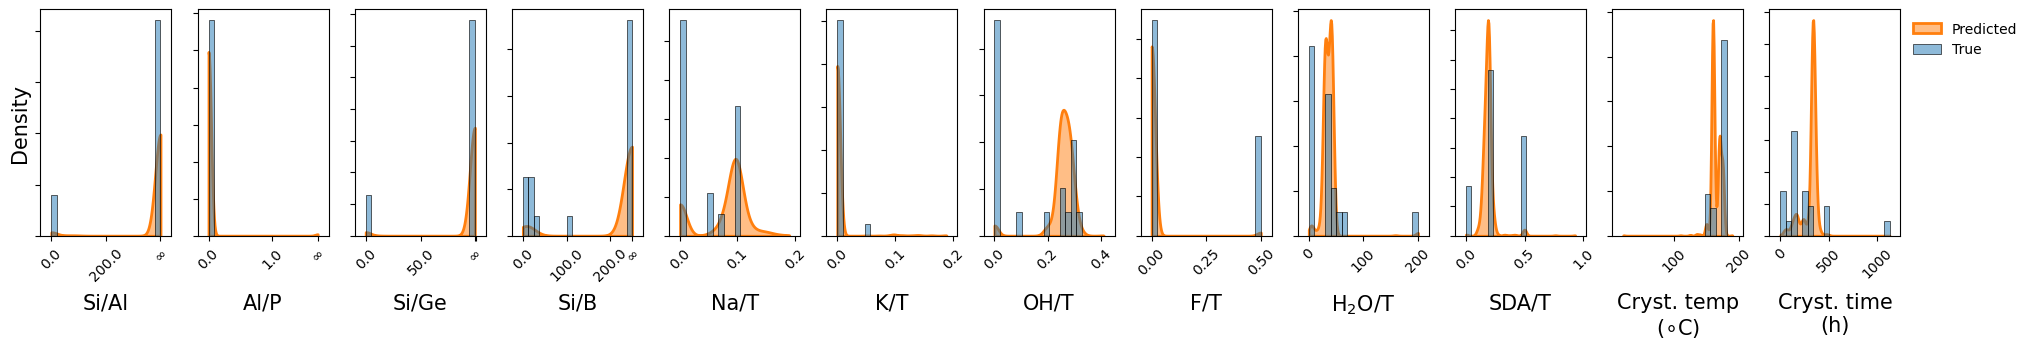

NSI c1cc(-c2ccncc2)ccn1
MMD: 2.684903144836426
WSD: 1.1717763371814436


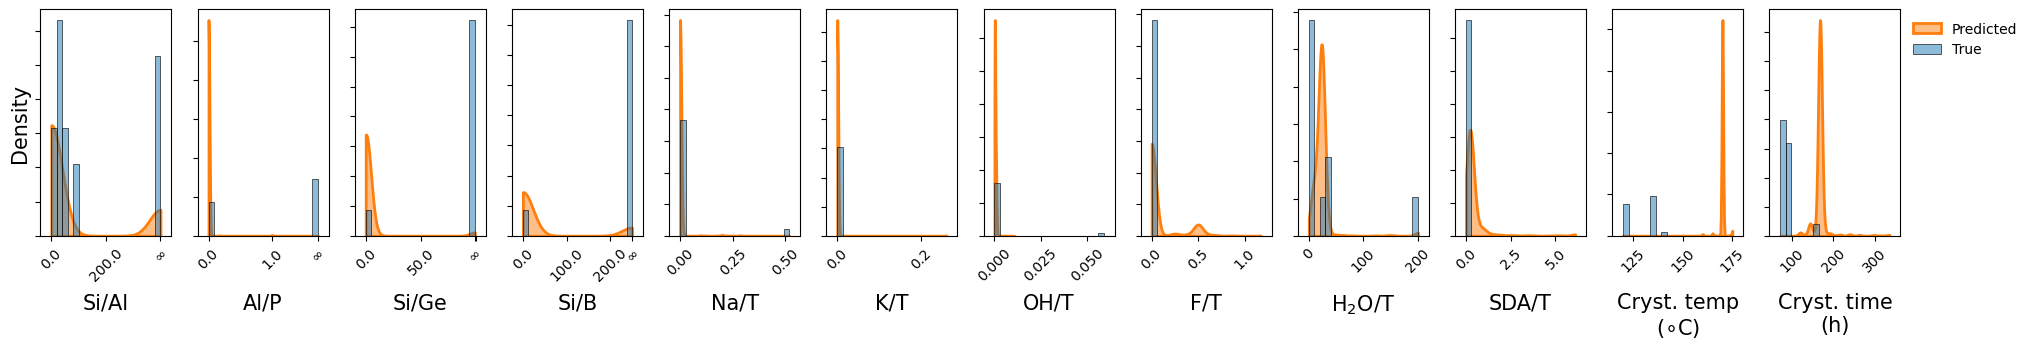

CON CC1(C)[C@H]2CC[C@@H](C[N+](C)(C)C)[C@@H]1C2
MMD: 1.0264005661010742
WSD: 0.27536487969970425


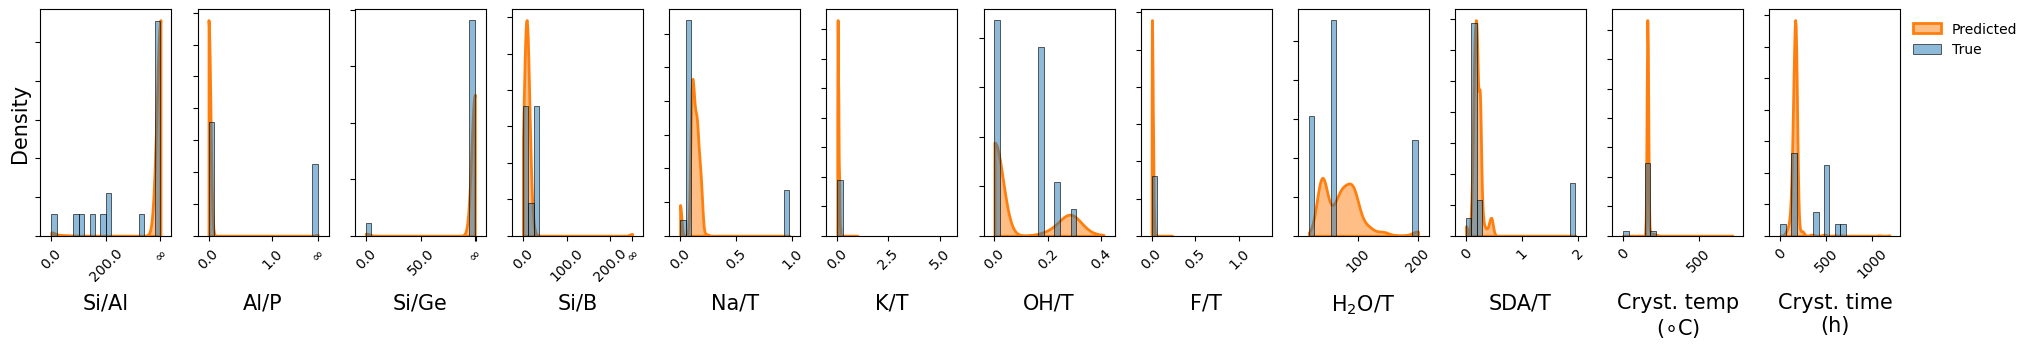

FER C1CNCCN1
MMD: 0.43534183502197266
WSD: 0.12291178714075567


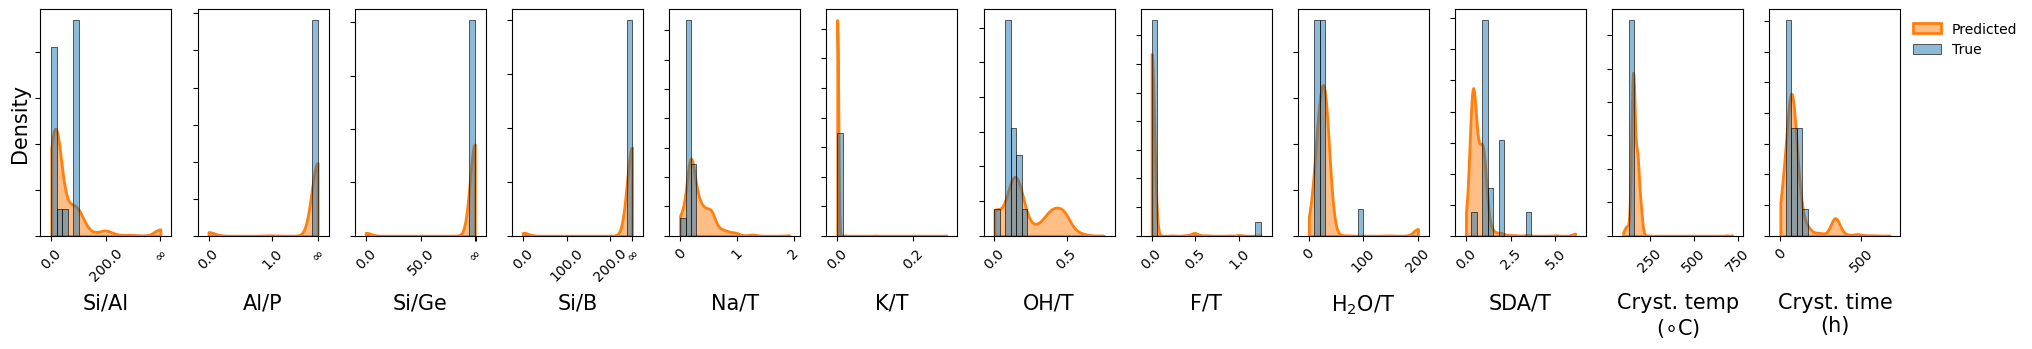

MTW C[N+]1(Cc2ccccc2)CCC(CCCCCC2CC[N+](C)(Cc3ccccc3)CC2)CC1
MMD: 0.42035770416259766
WSD: 0.007417406986174074


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: max must be larger than min in range parameter.

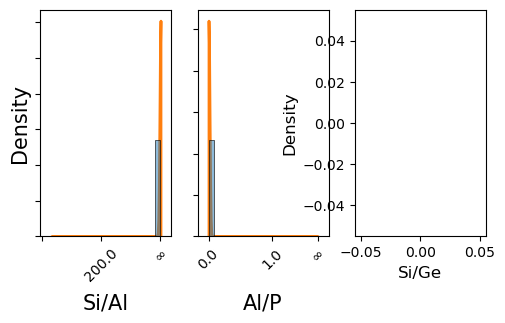

In [10]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 1.1972627639770508
WSD: 0.2987743059158537


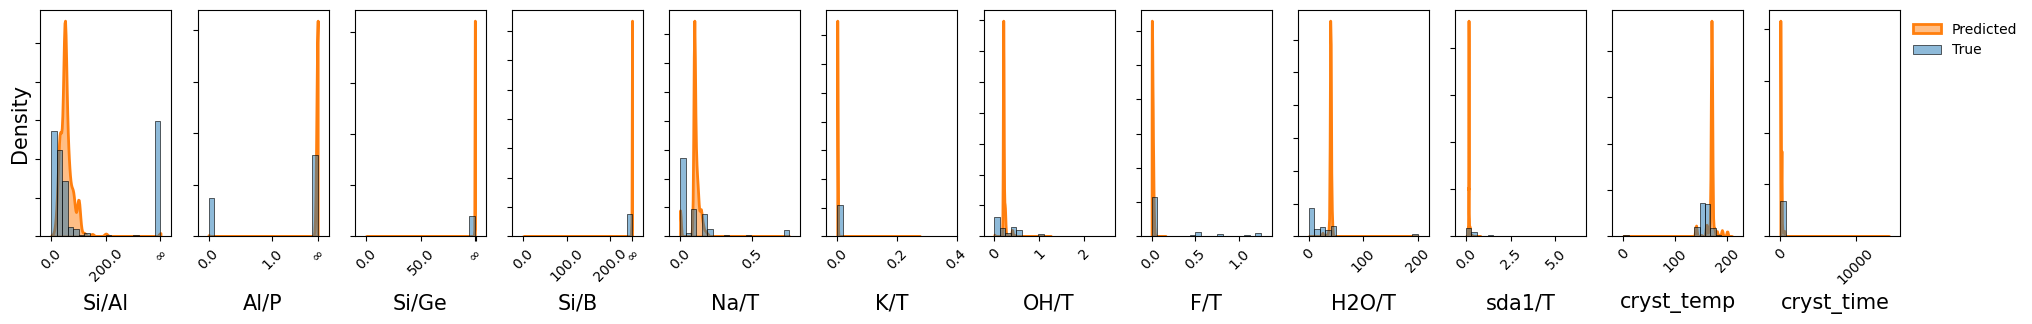

In [ ]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')